<a href="https://colab.research.google.com/github/srichandana498/ML/blob/main/ML_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Identify the Research Gap for Improvement**

While several studies have successfully applied machine learning models to predict heart disease, there remain notable gaps in existing research. Many approaches focus on single classifiers, such as Logistic Regression or Decision Trees, without exploring the advantages of ensemble methods like Random Forest and Gradient Boosting for improved accuracy and robustness. Furthermore, hyperparameter tuning is often limited or overlooked, which can prevent models from reaching their full predictive potential. Handling class imbalance, which is common in medical datasets, is frequently neglected, potentially leading to biased predictions. Additionally, few studies provide clear comparisons between multiple ensemble methods along with visualizations and interpretability analyses, such as feature importance and confusion matrices. These gaps highlight opportunities for future research to enhance predictive performance, interpretability, and clinical relevance in heart disease prediction using ensemble learning.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load dataset
df = pd.read_csv("/content/heart_disease_uci (2).csv")
print(df.head())

# Example ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [26]:
# data preprocessing
# Check for missing values
print(df.isnull().sum())

# Strip whitespace from 'ca' and 'thal' columns
df['ca'] = df['ca'].astype(str).str.strip()
df['thal'] = df['thal'].astype(str).str.strip()

# Replace '?' with NaN in 'ca' and 'thal' columns
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)

# Convert 'ca' and 'thal' to numeric with errors='coerce' before imputation
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')


# Fill missing values
# Select numeric columns for median imputation (now includes converted 'ca' and 'thal')
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Select non-numeric columns for mode imputation (excluding 'dataset' and the now numeric 'ca', 'thal')
# Re-select non-numeric columns after converting 'ca' and 'thal'
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.drop('dataset', errors='ignore')
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Drop the 'dataset' column as it's not suitable for modeling
df = df.drop('dataset', axis=1, errors='ignore')



# Split into features and target
# Drop the 'id' column as it's not a feature for the model
X = df.drop(['num', 'id'], axis=1)
y = df['num']

# Print dtypes before one-hot encoding
print("Data types before one-hot encoding:")
print(X.dtypes)

# One-hot encode categorical columns
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Print dtypes after one-hot encoding
print("\nData types after one-hot encoding:")
print(X.dtypes)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

id            0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca            0
thal        920
num           0
dtype: int64
Data types before one-hot encoding:
age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal        float64
dtype: object

Data types after one-hot encoding:
age                           int64
trestbps                    float64
chol                        float64
fbs                            bool
thalch                      float64
oldpeak                     float64
ca                          float64
sex_Male                       bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
reste

In [16]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# ---------------------------------
#  Tune Random Forest
# ---------------------------------
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

rf_grid.fit(X_train, y_train)

print("✅ Best Random Forest Params:", rf_grid.best_params_)
print("✅ Best Random Forest Accuracy:", rf_grid.best_score_)


✅ Best Random Forest Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best Random Forest Accuracy: 0.5883250597536311


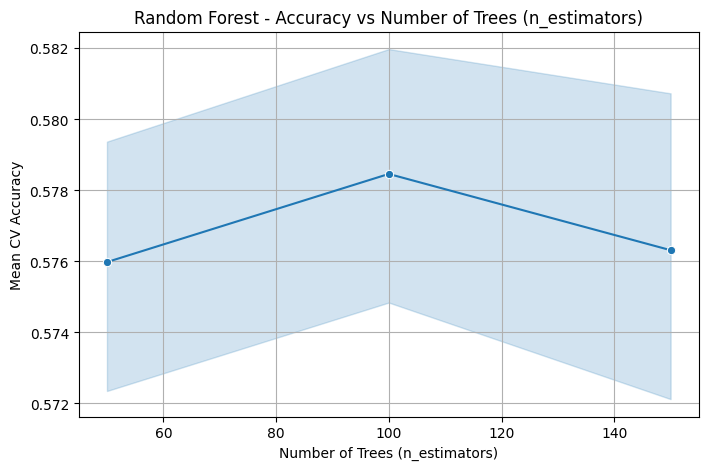

In [18]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Convert GridSearchCV results to DataFrame
rf_results = pd.DataFrame(rf_grid.cv_results_)

# Plot n_estimators vs mean test score
plt.figure(figsize=(8,5))
sns.lineplot(data=rf_results, x='param_n_estimators', y='mean_test_score', marker='o')
plt.title("Random Forest - Accuracy vs Number of Trees (n_estimators)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()


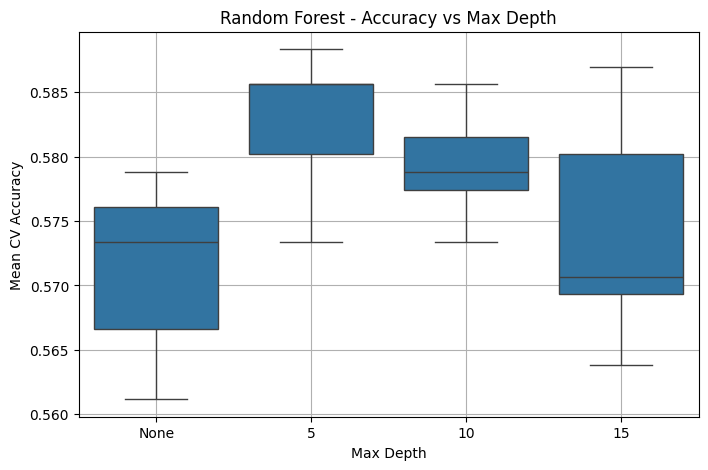

In [30]:
# ===============================================
# Visualize Random Forest Accuracy vs Max Depth
# ===============================================

# Step 1: Convert 'param_max_depth' to string
# This ensures seaborn treats it as categorical data, avoiding errors with None values.
rf_results['param_max_depth'] = rf_results['param_max_depth'].astype(str)

# Step 2: Set the figure size
plt.figure(figsize=(8,5))

# Step 3: Create a boxplot
# x-axis: different max_depth values
# y-axis: mean cross-validation accuracy (mean_test_score)
# data: GridSearchCV results stored in rf_results
sns.boxplot(x='param_max_depth', y='mean_test_score', data=rf_results)

# Step 4: Add plot title and axis labels
plt.title("Random Forest - Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")

# Step 5: Add grid lines for better readability
plt.grid(True)

# Step 6: Display the plot
plt.show()


In [31]:
# ===============================================
# Hyperparameter Tuning, Training, and Evaluation
# ===============================================

# Step 1: Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Define base models
# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)

# Step 3: Define hyperparameter grids for tuning
# Random Forest parameters to try
rf_param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [3, 5, None],           # Maximum depth of each tree
    'min_samples_split': [2, 5]          # Minimum samples required to split a node
}

# Gradient Boosting parameters to try
gb_param_grid = {
    'n_estimators': [100, 200],          # Number of boosting stages
    'learning_rate': [0.05, 0.1],        # Step size shrinkage
    'max_depth': [3, 5]                  # Maximum depth of each tree
}

# Step 4: Setup GridSearchCV with 5-fold cross-validation
# n_jobs=-1 uses all CPU cores for faster computation
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
gb_grid = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Step 5: Fit the GridSearchCV objects to training data
# This finds the best hyperparameters based on cross-validation
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)

# Step 6: Get the best estimators after tuning
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

# Step 7: Make predictions on the test set
rf_pred = best_rf.predict(X_test)
gb_pred = best_gb.predict(X_test)

# Step 8: Evaluate the models
# Random Forest evaluation
print("🔹 Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report (RF):\n", classification_report(y_test, rf_pred))

# Gradient Boosting evaluation
print("\n🔹 Gradient Boosting Best Parameters:", gb_grid.best_params_)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report (GB):\n", classification_report(y_test, gb_pred))


🔹 Random Forest Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.5108695652173914

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.60      0.92      0.73        75
           1       0.37      0.46      0.41        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4

    accuracy                           0.51       184
   macro avg       0.19      0.28      0.23       184
weighted avg       0.35      0.51      0.42       184


🔹 Gradient Boosting Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Accuracy: 0.5652173913043478

Classification Report (GB):
               precision    recall  f1-score   support

           0       0.68      0.92      0.78        75
           1       0.46      0.46      0.46        54
    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


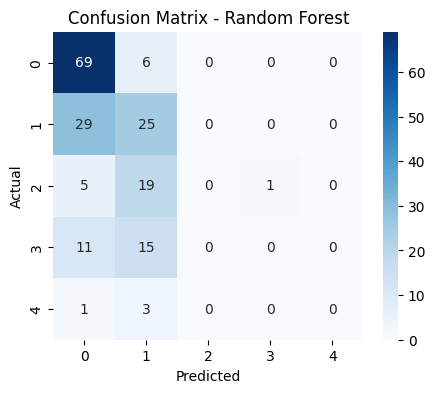

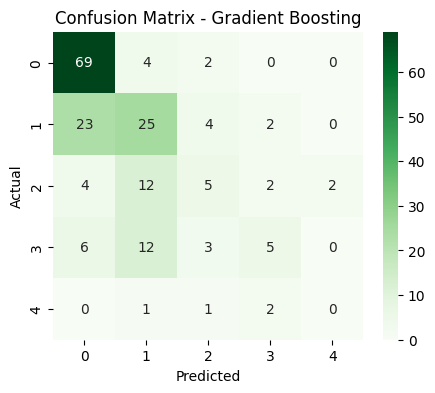

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# -----------------------------
# 1️⃣ Confusion Matrix - Random Forest
# -----------------------------
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 2️⃣ Confusion Matrix - Gradient Boosting
# -----------------------------
gb_cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(5,4))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-3386286539.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='coolwarm')


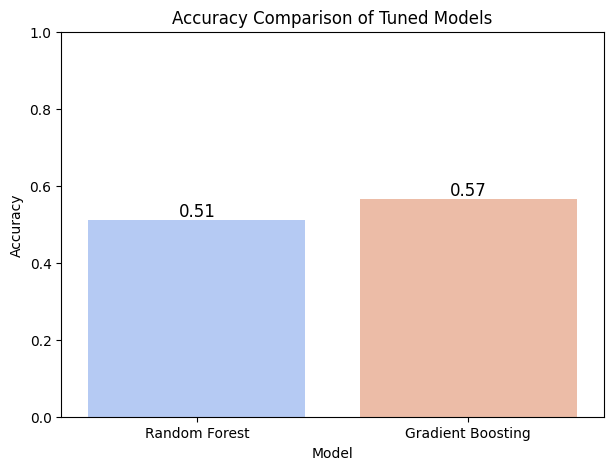

In [29]:
# -----------------------------
# 3️⃣ Accuracy Comparison Bar Chart (Fixed Version)
# -----------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Step 1: Define models and their accuracies
models = ['Random Forest', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred)
]

# Step 2: Create a DataFrame for plotting (more reliable)
acc_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Step 3: Plot bar chart
plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='coolwarm')

# Step 4: Set limits, labels, and title
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Tuned Models")

# Step 5: Annotate each bar with the exact accuracy value
for i, row in acc_df.iterrows():
    plt.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center', fontsize=12)

# Step 6: Show the plot
plt.show()

